# Predict Cardio Diseases Based On Medical Records

- pca
- random forest + feature extraction
- k means
- svm

Columns:

- Age | Objective Feature | age | int (days)
- Height | Objective Feature | height | int (cm) |
- Weight | Objective Feature | weight | float (kg) |
- Gender | Objective Feature | gender | categorical code |
- Systolic blood pressure | Examination Feature | ap_hi | int |
- Diastolic blood pressure | Examination Feature | ap_lo | int |
- Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
- Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
- Smoking | Subjective Feature | smoke | binary |
- Alcohol intake | Subjective Feature | alco | binary |
- Physical activity | Subjective Feature | active | binary |
- Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

In [1]:
# imports section
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**EDA Section**

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


age            0.238159
gender         0.008109
height        -0.010821
weight         0.181660
ap_hi          0.054475
ap_lo          0.065719
cholesterol    0.221147
gluc           0.089307
smoke         -0.015486
alco          -0.007330
active        -0.035653
dtype: float64


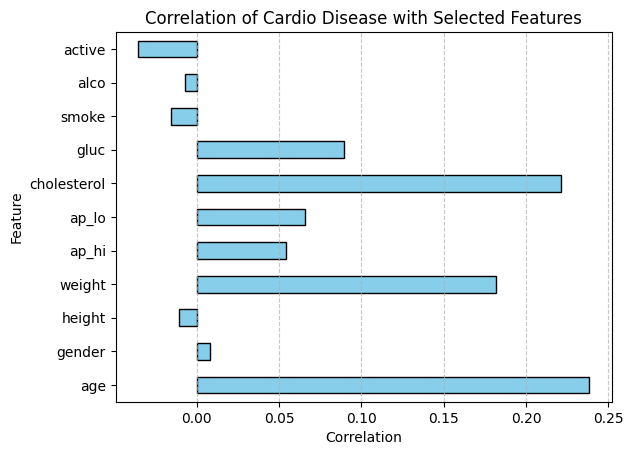

In [3]:
df = pd.read_csv("../resources/cardio_train.csv", sep=';') 
display(df.head(10))

selected_fields = ["age", "gender", "height", "weight", "ap_hi", "ap_lo", "cholesterol",
                "gluc", "smoke", "alco", "active" ]

correlation_results = df[selected_fields].corrwith(df["cardio"])
print(correlation_results)

correlation_results.plot(kind="barh", color="skyblue", edgecolor="black")
plt.xlabel("Correlation")
plt.ylabel("Feature")
plt.title("Correlation of Cardio Disease with Selected Features")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

**PCA**

Explained variance ratio: [0.22571418 0.18293082]
Cumulative variance: 0.40864500095919254
        PC1       PC2  Original_Index  cardio
0 -0.994060 -0.029125               0       0
1  1.588150  0.669888               1       1
2  0.978195  0.641862               2       1
3 -0.595357 -1.049626               3       1
4 -1.331258  1.221807               4       0


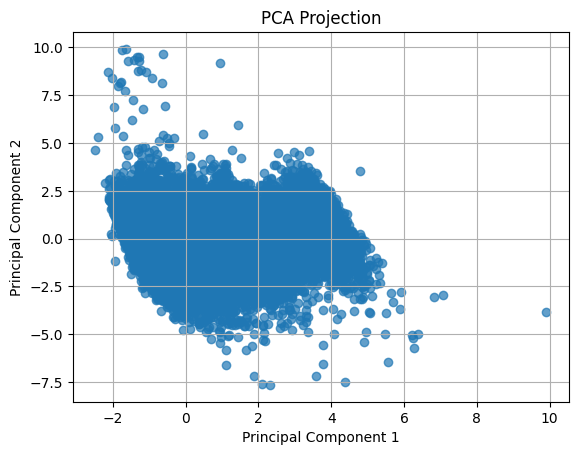

In [11]:
# PCA application in correlation investigation:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

columns_for_pca = ["age", "height", "weight", "ap_hi", "ap_lo", "cholesterol", 
                   "gluc"] 
X = df[columns_for_pca]

# standartize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Cumulative variance:", pca.explained_variance_ratio_.sum())

df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["Original_Index"] = df.index  # retain original index
df_pca["cardio"] = df["cardio"]
print(df_pca.head())

plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection")
plt.grid(True)
plt.show()

**K Means**

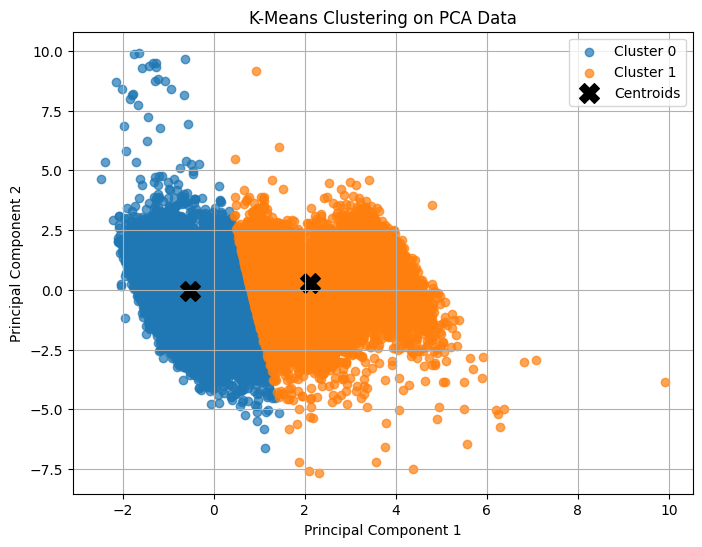

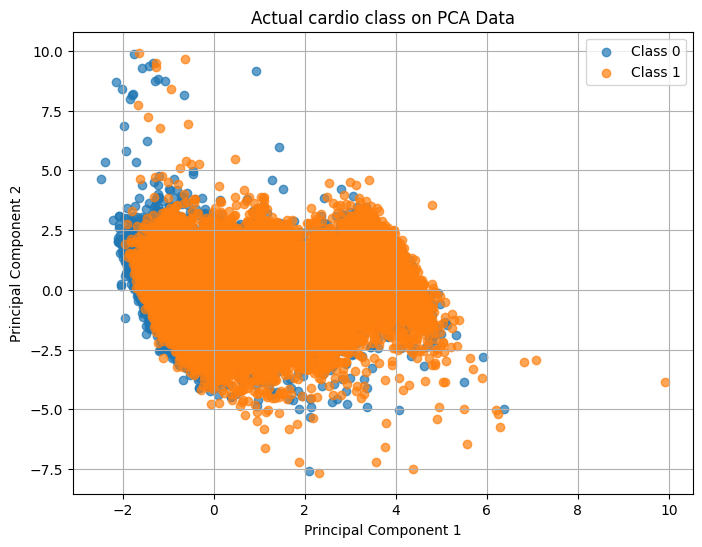

In [12]:
from sklearn.cluster import KMeans

n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
df_pca["cluster"] = kmeans.fit_predict(df_pca[["PC1", "PC2"]])

cluster_centers = kmeans.cluster_centers_ # cluster centers


plt.figure(figsize=(8, 6))
for cluster in range(n_clusters): # scatter plot, color by clusters
    subset = df_pca[df_pca["cluster"] == cluster]
    plt.scatter(subset["PC1"], subset["PC2"], label=f"Cluster {cluster}", alpha=0.7)

# plot cluster centers
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c="black", marker="X", s=200, label="Centroids")

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering on PCA Data")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(8, 6))
for cardio in range(2): # scatter plot, color by cardio data
    subset = df_pca[df_pca["cardio"] == cardio]
    plt.scatter(subset["PC1"], subset["PC2"], label=f"Class {cardio}", alpha=0.7)

# plot cluster centers

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Actual cardio class on PCA Data")
plt.legend()
plt.grid(True)
plt.show()

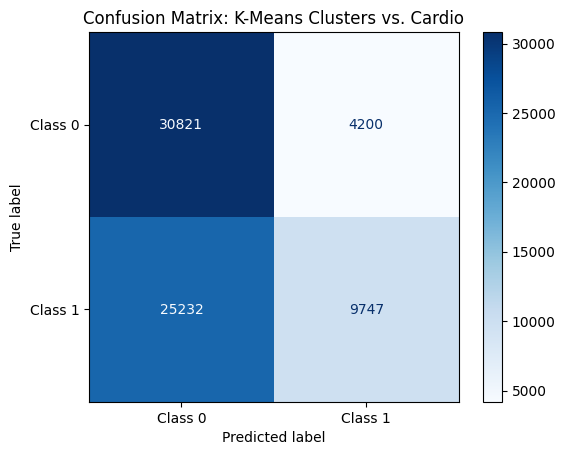

In [13]:
# compare with cardio field and display confusion matrix:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = df["cardio"] 
y_pred = df_pca["cluster"]  

cm = confusion_matrix(y_true, y_pred) # compute confusion matrix

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix: K-Means Clusters vs. Cardio")
plt.show()

*Intermediate Conclusion*: Unsupervised learning techniques, such as PCA and K-means clustering do not properly predict heart condition.

**Random Forest and Feature Extraction**

Accuracy: 0.7130
              precision    recall  f1-score   support

           0       0.71      0.72      0.72      6988
           1       0.72      0.70      0.71      7012

    accuracy                           0.71     14000
   macro avg       0.71      0.71      0.71     14000
weighted avg       0.71      0.71      0.71     14000



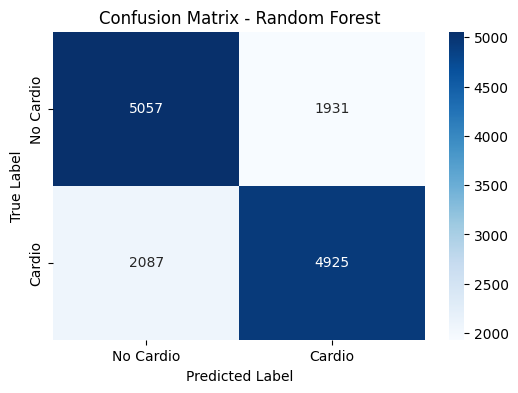

        Feature  Importance
0           age    0.309179
4         ap_hi    0.175971
3        weight    0.172267
2        height    0.157043
5         ap_lo    0.087078
6   cholesterol    0.038196
7          gluc    0.016255
1        gender    0.015695
10       active    0.012888
8         smoke    0.008143


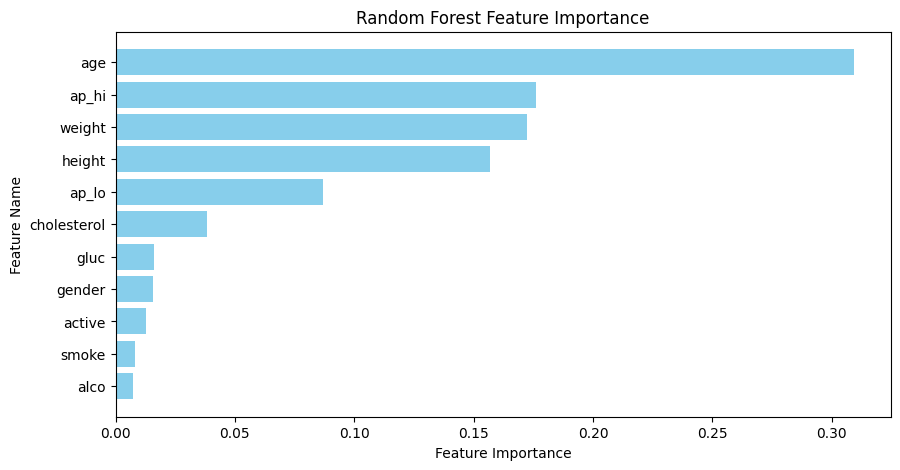

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# prepare the data
X = df.drop(columns=["cardio", "id"])
y = df["cardio"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train rf classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

# confusion matrix:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Cardio", "Cardio"], yticklabels=["No Cardio", "Cardio"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# feature importance analysis:

importances = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({ # dataframe for visualization
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(feature_importance_df.head(10)) # top 10 features

plt.figure(figsize=(10, 5))
plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"], color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()  # Invert y-axis to have the most important on top
plt.show()


The confusion matrix shows:
- True Positives (TP): Correctly predicted "cardio" (bottom-right)
- True Negatives (TN): Correctly predicted "no cardio" (top-left)
- False Positives (FP): Misclassified "no cardio" as "cardio" (top-right)
- False Negatives (FN): Misclassified "cardio" as "no cardio" (bottom-left)

**Support Vector Machines**

Accuracy: 0.6054
              precision    recall  f1-score   support

           0       0.60      0.65      0.62      6988
           1       0.62      0.56      0.59      7012

    accuracy                           0.61     14000
   macro avg       0.61      0.61      0.60     14000
weighted avg       0.61      0.61      0.60     14000



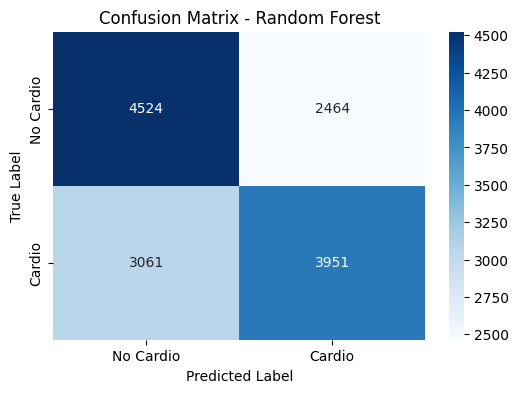

In [17]:
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# initialize svm classifier
svm_model = SVC(kernel="rbf", probability=True, random_state=42)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

# confusion matrix:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Cardio", "Cardio"], yticklabels=["No Cardio", "Cardio"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest")
plt.show()
